In [6]:
import numpy as np
import pandas as pd


In [41]:
from sklearn.datasets import fetch_20newsgroups
# mydata_train = fetch_20newsgroups(subset='train', shuffle=True)
mydata_train = fetch_20newsgroups(subset='train', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [42]:
print('Training data size:', len(mydata_train['data']))


Training data size: 11314


In [43]:
len(mydata_train['target'])

11314

In [45]:
targets, frequency = np.unique(mydata_train.target, return_counts=True)
targets, frequency 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377], dtype=int64))

In [46]:
targets_str = np.array(mydata_train.target_names)
print(list(zip(targets_str, frequency)))


[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


In [39]:
len(test_data)

5

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import pandas as pd
import random

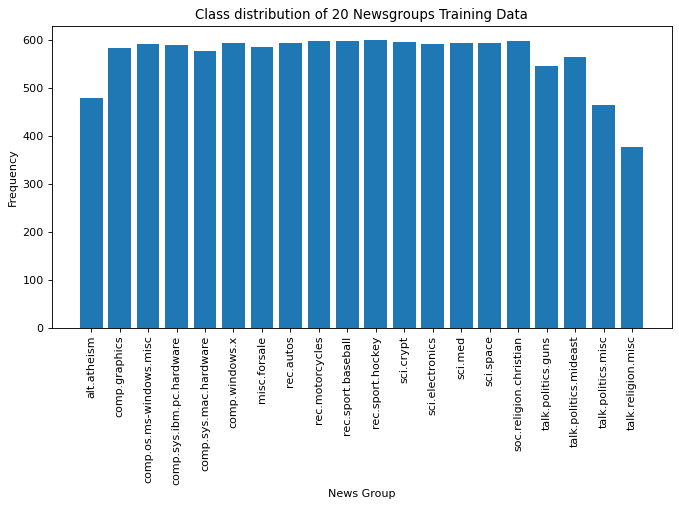

In [48]:
# Training data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()


In [49]:
# mydata_test = fetch_20newsgroups(subset='test', shuffle=True)
mydata_test = fetch_20newsgroups(subset='test', shuffle=True, remove = ('headers', 'footers', 'quotes'))


In [50]:
print('Testing data size:', len(mydata_test['data']))

Testing data size: 7532


In [51]:
# Finding frequency of each category
targets_test, frequency_test = np.unique(mydata_test.target, return_counts=True)
targets_test_str = np.array(mydata_test.target_names)
print(list(zip(targets_test_str, frequency_test)))


[('alt.atheism', 319), ('comp.graphics', 389), ('comp.os.ms-windows.misc', 394), ('comp.sys.ibm.pc.hardware', 392), ('comp.sys.mac.hardware', 385), ('comp.windows.x', 395), ('misc.forsale', 390), ('rec.autos', 396), ('rec.motorcycles', 398), ('rec.sport.baseball', 397), ('rec.sport.hockey', 399), ('sci.crypt', 396), ('sci.electronics', 393), ('sci.med', 396), ('sci.space', 394), ('soc.religion.christian', 398), ('talk.politics.guns', 364), ('talk.politics.mideast', 376), ('talk.politics.misc', 310), ('talk.religion.misc', 251)]


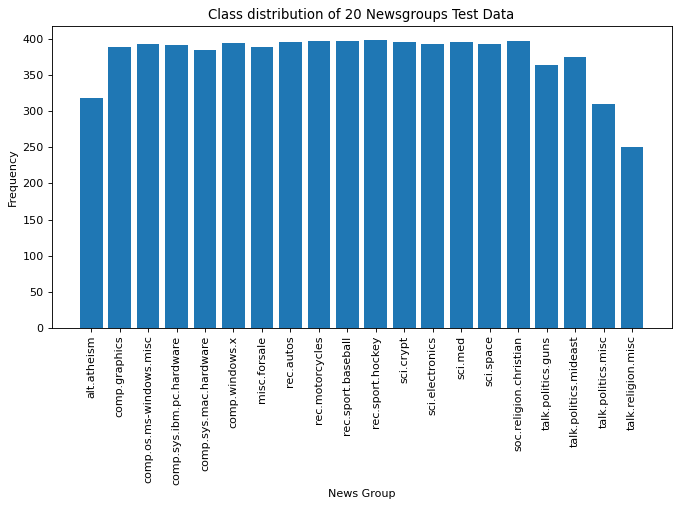

In [52]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_test_str,frequency_test)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

In [53]:
mydata_train_df = pd.DataFrame({'data': mydata_train.data, 'target': mydata_train.target})
mydata_train_df.head()

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [54]:
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_train_df['data'] = mydata_train_df.data.map(alphanumeric).map(punc_lower)
mydata_train_df.head()

,data,target
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gh...,4
3,\ndo you have weitek s address phone number ...,1
4,from article world std com by tombaker ...,14


In [55]:
# Preparing test data
mydata_test_df = pd.DataFrame({'data': mydata_test.data, 'target': mydata_test.target})
mydata_test_df.head()

,data,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19


In [56]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_test_df['data'] = mydata_test_df.data.map(alphanumeric).map(punc_lower)
mydata_test_df.head()


,data,target
0,i am a little confused on all of the models of...,7
1,i m not familiar at all with the format of the...,5
2,\nin a word yes \n,0
3,\nthey were attacking the iraqis to drive them...,17
4,\ni ve just spent two solid months arguing tha...,19


In [58]:
merged_df= pd.concat([mydata_train_df, mydata_test_df], axis=0)


In [59]:
merged_df

,data,target
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gh...,4
3,\ndo you have weitek s address phone number ...,1
4,from article world std com by tombaker ...,14
...,...,...
7527,\n henry if i read you correctly you may b...,14
7528,about\nthem on\n\nactually i thought macs wer...,4
7529,i sent a version of this post out a while ago ...,9
7530,i have this kit which includes the following ...,6


In [61]:
merged_df.to_csv('20_newsgroups_cleaned_data.csv', index = False)